# Задание

1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

2. Подберите параметры модели SARIMAX для этого ряда.

3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import warnings
import itertools


from sklearn.metrics import mean_squared_error
import os

In [11]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [12]:
data_m = data.resample('M').mean()

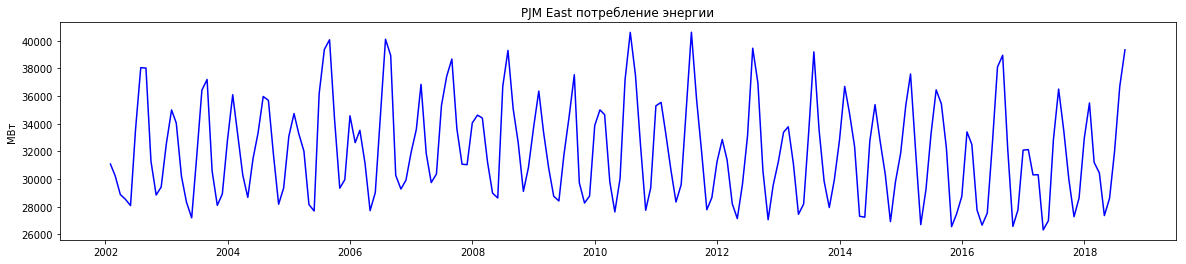

In [13]:
plt.figure(figsize =(20,4))
plt.plot( data_m.index, data_m['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel( 'МВт' )
plt.show()

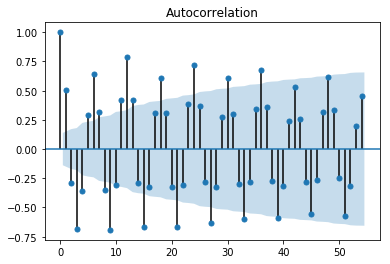

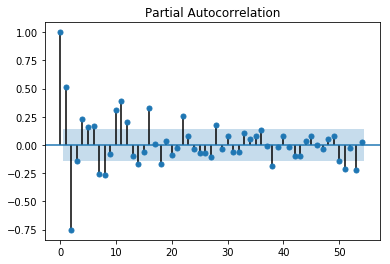

In [14]:
# ---
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=54)
plt.show()
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=54)
plt.show()

In [15]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 0, 0, 52)
SARIMAX: (0, 0, 2) x (0, 0, 0, 52)
SARIMAX: (0, 0, 2) x (0, 0, 1, 52)


In [16]:
data_m['PJME_MW'].values.shape

(200,)

In [17]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-30],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 52) - AIC:3992.5110075928433
SARIMAX(0, 0, 0)x(0, 0, 1, 52) - AIC:4882.894668839681
SARIMAX(0, 0, 0)x(0, 1, 0, 52) - AIC:2368.6060033947715
SARIMAX(0, 0, 1)x(0, 0, 0, 52) - AIC:3849.2578786437625
SARIMAX(0, 0, 1)x(0, 0, 1, 52) - AIC:nan
SARIMAX(0, 0, 1)x(0, 1, 0, 52) - AIC:2286.1393302261527
SARIMAX(0, 0, 2)x(0, 0, 0, 52) - AIC:3799.369172295658
SARIMAX(0, 0, 2)x(0, 0, 1, 52) - AIC:61889.471419488014
SARIMAX(0, 0, 2)x(0, 1, 0, 52) - AIC:2216.301855674237
SARIMAX(0, 1, 0)x(0, 0, 0, 52) - AIC:3217.1504494830824
SARIMAX(0, 1, 0)x(0, 0, 1, 52) - AIC:4903.216620326153
SARIMAX(0, 1, 0)x(0, 1, 0, 52) - AIC:2340.261005371085
SARIMAX(0, 1, 1)x(0, 0, 0, 52) - AIC:3170.8775710968084
SARIMAX(0, 1, 1)x(0, 0, 1, 52) - AIC:9943.91317680888
SARIMAX(0, 1, 1)x(0, 1, 0, 52) - AIC:2291.4990389194513
SARIMAX(0, 1, 2)x(0, 0, 0, 52) - AIC:3112.540758303965
SARIMAX(0, 1, 2)x(0, 0, 1, 52) - AIC:10017.888074551382
SARIMAX(0, 1, 2)x(0, 1, 0, 52) - AIC:2269.1277505595785
SARIMAX(0, 2, 0

In [19]:
# наименьшее значение AIC 2117. SARIMAX(2, 1, 2)x(0, 1, 0, 52)
#для построения модели используем все данные, кроме 3-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения
nforecast = 10

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-3],order=[2,1,2],
                                seasonal_order=[0,1,0,52] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 2612.638382139481


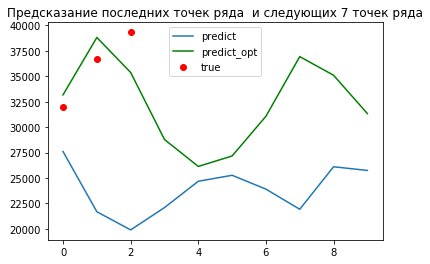

In [21]:
pred_dynamic = results.forecast(nforecast)
pred_dynamic_opt = results_opt.forecast(nforecast)

plt.plot(pred_dynamic, label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_m['PJME_MW'].values[-3:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 7 точек ряда')
plt.legend()

plt.show()

In [22]:
results_opt.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,1.0014,0.003,391.208,0.000,0.996,1.006
ar.L2,-1.0051,0.003,-395.695,0.000,-1.010,-1.000
ma.L1,-0.9914,0.066,-14.932,0.000,-1.122,-0.861
ma.L2,0.9990,0.112,8.906,0.000,0.779,1.219
sigma2,7.625e+06,1.11e-08,6.87e+14,0.000,7.63e+06,7.63e+06


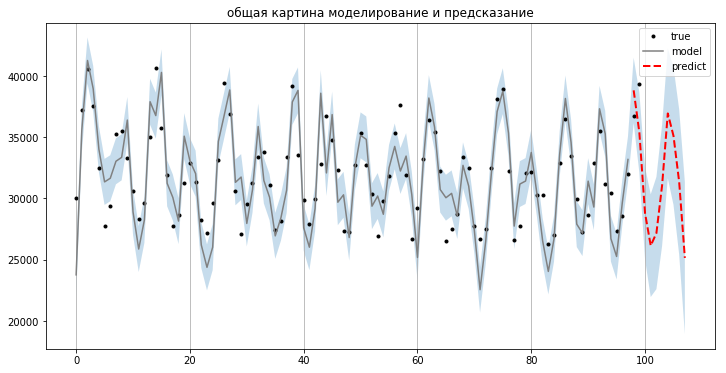

In [26]:
N3=100
predict_ = results_opt.get_prediction(end=results_opt.nobs + nforecast)  # делаем предсказание

# отображаем
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.grid()
ax.plot(data_m['PJME_MW'].values[N3:], 'k.',label='true')

# 
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], 'gray',label = 'model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2, label='predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.25)
plt.legend()
ax.set(title='общая картина моделирование и предсказание');

### Вывод:
Красивый график получился :) По сравнению с моделью на недельных данных в текущей модели предсказание новых точек прошло еще слабее. Но это не точно :) 

4. Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)
   
5. Оцените результат моделирования

6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии  на основе AR I MA.

In [42]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [58]:
brent_m = brent_data.resample('M').mean()
brent_m.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-30,78.228148,2010.0,9.0,15.185185,3.0,258.185185,36.925926,2.703704,0.037037,0.037037,0.037037
2010-10-31,83.473462,2010.0,10.0,16.000000,4.0,289.000000,41.307692,2.846154,0.038462,0.038462,0.038462
2010-11-30,86.178077,2010.0,11.0,15.346154,4.0,319.346154,45.692308,2.500000,0.076923,0.076923,0.076923
2010-12-31,92.232308,2010.0,12.0,16.384615,4.0,350.384615,50.115385,2.576923,0.076923,0.076923,0.000000
2011-01-31,97.033200,2011.0,1.0,16.680000,1.0,16.680000,4.640000,2.760000,0.040000,0.040000,0.040000


In [54]:
brent_w = brent_data.resample('W').mean()
brent_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


Text(0.5, 0, 't')

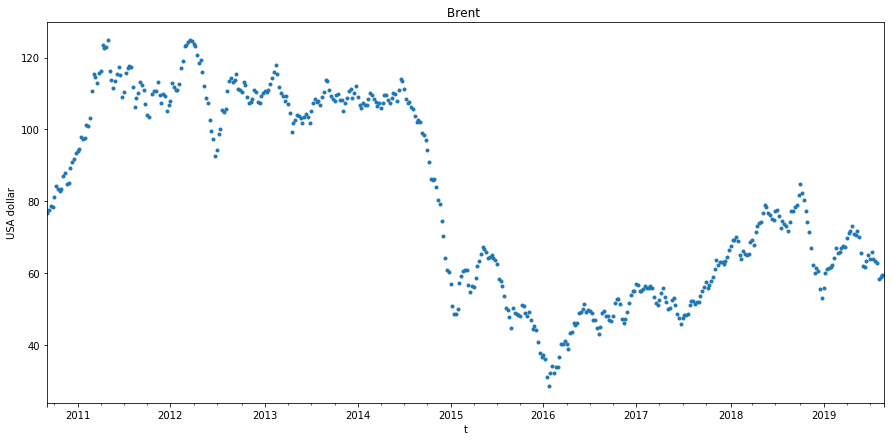

In [61]:
_ = brent_w['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

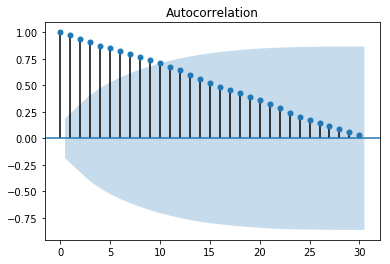

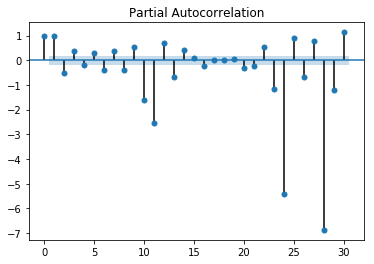

In [65]:
# Месячные данные. ACF и PACF есть данные на графике
sm.graphics.tsa.plot_acf(brent_m['Значение'].values, lags=30)
plt.show()
sm.graphics.tsa.plot_pacf(brent_m['Значение'].values, lags=30)
plt.show()

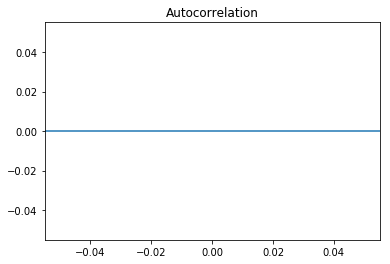

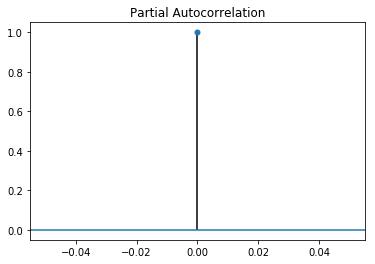

In [64]:
# Недельные данные. Тут непонятно, что произошло на недельных данных..
sm.graphics.tsa.plot_acf(brent_w['Значение'].values, lags=30)
plt.show()
sm.graphics.tsa.plot_pacf(brent_w['Значение'].values, lags=30)
plt.show()

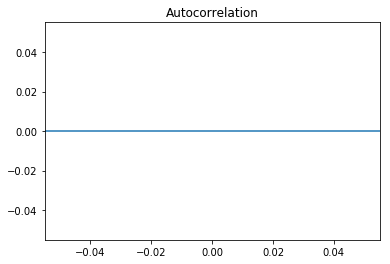

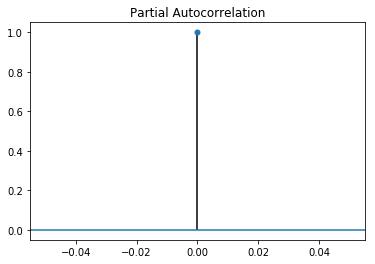

In [73]:
#  Полученные данные непонятны...
brent_dif = brent_w['Значение'].diff(1)

sm.graphics.tsa.plot_acf(brent_dif[1:], lags=30)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(brent_dif[1:], lags=30)
plt.show()

In [70]:
# Определим p, d и q. Учитывая, что на графиках выше непонятны данные, тычем пальцем в небо.
q = 1
p = 2
d = 2
pdq = [p, d, q]

N2=30
warnings.filterwarnings("ignore") # отключает предупреждения

modb = sm.tsa.statespace.SARIMAX(brent_w['Значение'].values[:-12],
                               order=pdq,seasonal_order=[0,0,0,0], trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb = modb.fit()
print('ARIMA{} - AIC:{}'.format(pdq, resultsb.aic))

print(resultsb.summary().tables[0],resultsb.summary().tables[1])

ARIMA[2, 2, 1] - AIC:2006.129178734523
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  458
Model:               SARIMAX(2, 2, 1)   Log Likelihood                -997.065
Date:                Wed, 20 May 2020   AIC                           2006.129
Time:                        00:20:09   BIC                           2030.838
Sample:                             0   HQIC                          2015.864
                                - 458                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    

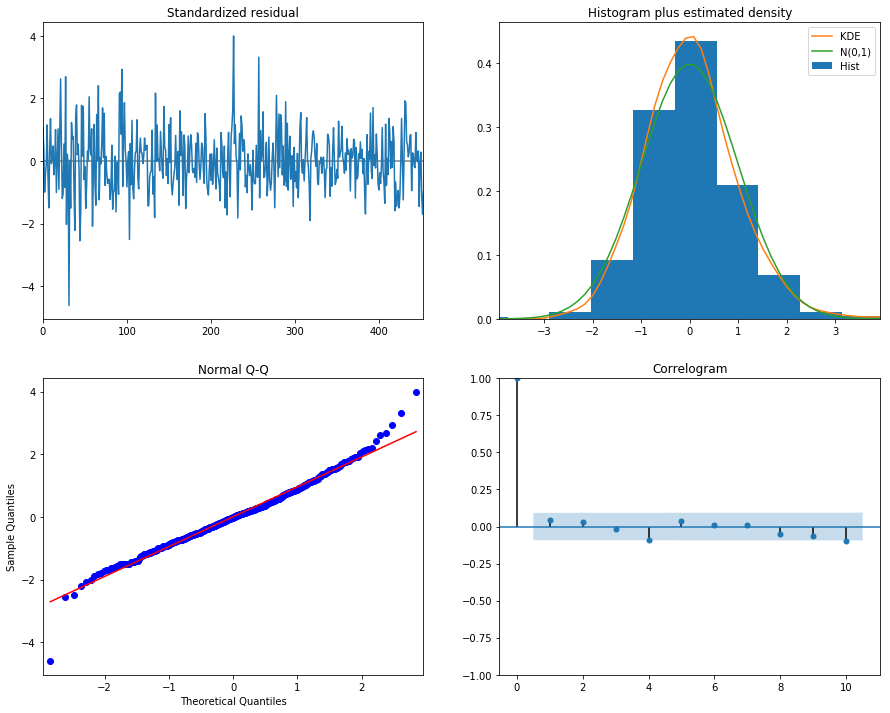

In [71]:
resultsb.plot_diagnostics(figsize=(15, 12))
plt.show()

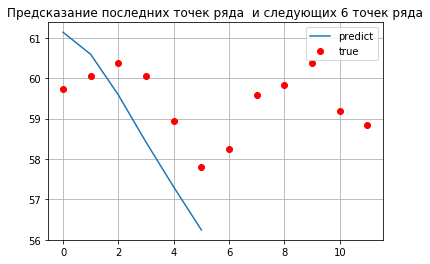

In [75]:
pred_dynamic = resultsb.forecast(6)

plt.plot(pred_dynamic, label='predict' )
#Отобразим истинный значения 
plt.plot(brent_data['Значение'].values[-12:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 6 точек ряда')
plt.legend()
plt.grid()
plt.plot()
plt.show()

In [76]:
import itertools
# Определим p, d и q в диапазоне 0-3
d = [0,1]
p = [0,1] 
q = range(0, 7)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] # нет сезона

warnings.filterwarnings("ignore") # отключает предупреждения

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_b = sm.tsa.statespace.SARIMAX(np.log(brent_w['Значение'].values[:-14]),
                                          order=param,seasonal_order=[0,0,0,0],trend='ct',
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results_ = mod_b.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

ARIMA(0, 0, 0)x[0, 0, 0, 0] - AIC:79.87938973004931
ARIMA(0, 0, 1)x[0, 0, 0, 0] - AIC:-494.7217403446085
ARIMA(0, 0, 2)x[0, 0, 0, 0] - AIC:-628.6711725282944
ARIMA(0, 0, 3)x[0, 0, 0, 0] - AIC:-1179.4778846751797
ARIMA(0, 0, 4)x[0, 0, 0, 0] - AIC:-1319.0327720766466
ARIMA(0, 0, 5)x[0, 0, 0, 0] - AIC:-1209.738083334404
ARIMA(0, 0, 6)x[0, 0, 0, 0] - AIC:-1334.8657741268717
ARIMA(0, 1, 0)x[0, 0, 0, 0] - AIC:-1814.3197655111385
ARIMA(0, 1, 1)x[0, 0, 0, 0] - AIC:-1865.6331606224394
ARIMA(0, 1, 2)x[0, 0, 0, 0] - AIC:-1858.8656338026735
ARIMA(0, 1, 3)x[0, 0, 0, 0] - AIC:-1854.0289609450792
ARIMA(0, 1, 4)x[0, 0, 0, 0] - AIC:-1847.1003591701583
ARIMA(0, 1, 5)x[0, 0, 0, 0] - AIC:-1841.9816416962235
ARIMA(0, 1, 6)x[0, 0, 0, 0] - AIC:-1839.6720260770012
ARIMA(1, 0, 0)x[0, 0, 0, 0] - AIC:-1819.436028085559
ARIMA(1, 0, 1)x[0, 0, 0, 0] - AIC:-1871.3580660463872
ARIMA(1, 0, 2)x[0, 0, 0, 0] - AIC:-1864.7416559501958
ARIMA(1, 0, 3)x[0, 0, 0, 0] - AIC:-1858.9533008212886
ARIMA(1, 0, 4)x[0, 0, 0, 0] - AIC:

минимальное ARIMA(1, 0, 1)x[0, 0, 0, 0] - AIC:-1871.3580660463872

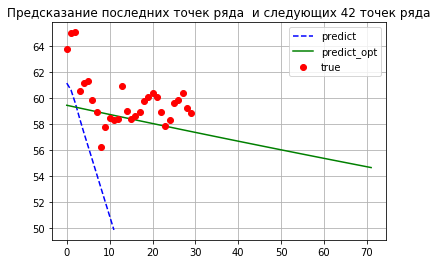

In [87]:
N2=30
nforecast = 12

modb_opt = sm.tsa.statespace.SARIMAX(brent_data['Значение'].values[:-4],
                               order=[1,0,1],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb_opt = modb_opt.fit()
pred_dynamic = resultsb.forecast(nforecast)    #делаем предсказание c 30 точки от текущего конца ряда
pred_dynamic_opt = resultsb_opt.forecast(72) 

plt.plot(pred_dynamic,'--b', label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(brent_data['Значение'].values[-N2:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 42 точек ряда')
plt.legend()
plt.grid()
plt.show()

In [88]:
resultsb_opt.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
intercept,0.3642,0.159,2.284,0.022,0.052,0.677
drift,-9.778e-05,4.5e-05,-2.173,0.030,-0.000,-9.59e-06
ar.L1,0.9971,0.001,741.562,0.000,0.994,1.000
ma.L1,-0.0627,0.016,-3.922,0.000,-0.094,-0.031
sigma2,1.5215,0.025,60.439,0.000,1.472,1.571


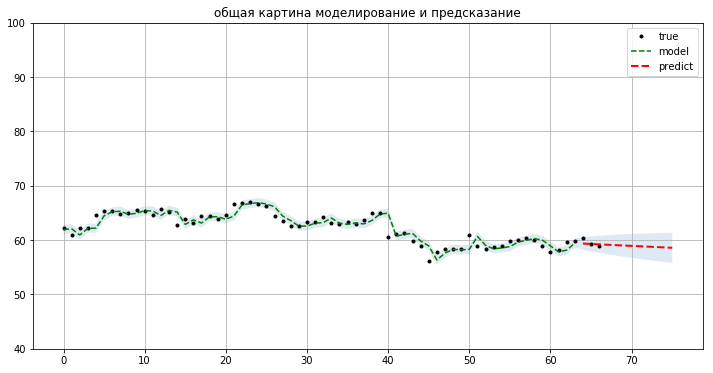

In [94]:

N3=2600
predict_ = resultsb_opt.get_prediction(end=resultsb_opt.nobs + nforecast)   
# получаем результаты работы модели по всей выборке

# отображаем результаты
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(brent_data['Значение'].values[N3:], 'k.',label='true')
plt.ylim([40,100])
plt.grid()
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], '--g',label='model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2,label = 'predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.15)
plt.legend()

ax.set(title='общая картина моделирование и предсказание');

### вывод
совсем запутался. Смущает, что на недельных данных ACF и PACF какие-то неправильные....